## Interpolating Polynomials with Newton's Divided Differences

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def newtons_divided_diff(x, y):
    # Compute coefficients for an (n-1)th degree interpolating polynomial using Newton's Divided difference formula
    # Inputs:
    # x = [x1, x2, ..., xn]: x-coordinates (distinct)
    # y = [y1, y2, ..., yn]: y-coordinates
    # Output: c = coefficients of interpolating polynomial. Arranged with constant term first, up to dth-order
      
    N = len(x) # Extract the number of points from the length of the arrays
    
    # Create a vector v of size NxN full of zeros
    v = np.zeros((N, N))
    v[:,0] = np.transpose(y)
    
    for i in range(1, N): # column i
        
        for j in range(0, N - i): # fill in column from top to bottom
            
            v[j,i] = (v[j+1, i-1] - v[j, i-1])/( x[j+i] - x[j])
    
    c = v[0, :]
    
    return c

In [3]:
def nested_poly(d,c,x,xcoord):
    # Form the interpolating polynomial
    # Inputs: 
    # d - degree of the polynomial
    # c - coefficients. len(c) = d+1. Arranged with constant term first, up to dth-order term
    # x - values at which to evaluate the polynomial
    # (optional) xcoord = [x1, x2, ..., xn]. len(xcoord) = d

    y = c[d]
    
    for k in range(d, 0, -1):
        
        y = y*(x - xcoord[k-1]) + c[k-1]
 
    return y    

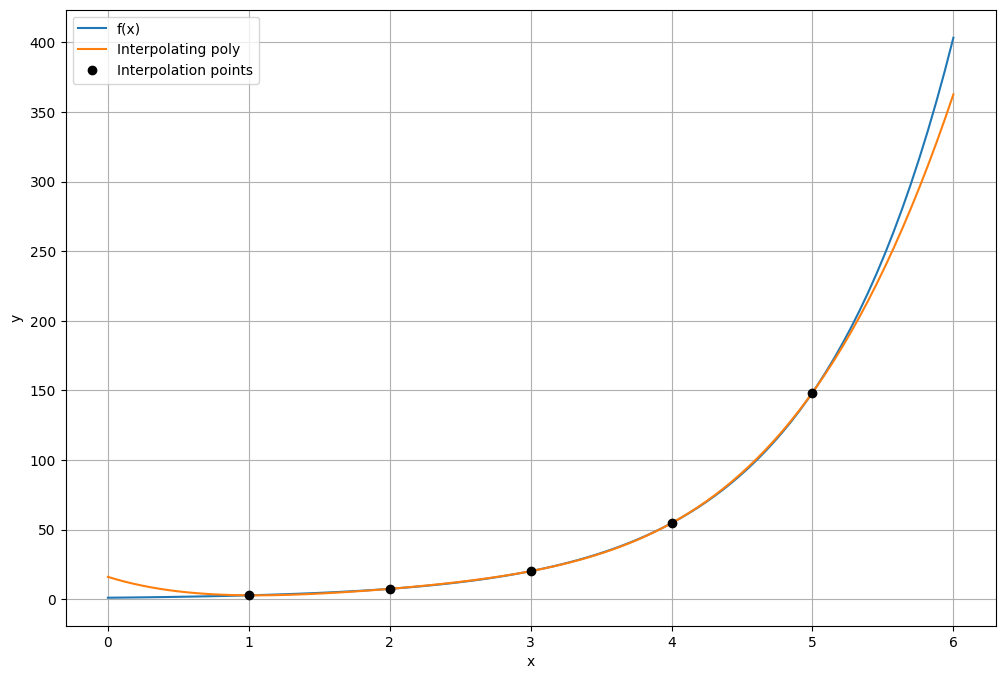

In [4]:
# Compute the dth degree polynomial interpolant of f(x) = exp(x) using the interpolation points x0 in the interval [a,b]

d = 4
a = 1
b = 5
x0 = np.linspace(a,b,d+1) # Interpolation points

f = lambda x: np.exp(x)

# Grid points to evaluate the interpolating polynomial and f(x) at
# Extend the interval slightly outside [a,b]
x = np.linspace(a-1,b+1,100)   

c = newtons_divided_diff(x0,f(x0)) # Coefficients for interpolating polynomial
y = nested_poly(d,c,x,x0)  # Evaluate the polynomial at the points x.

# Plot f(x) and interpolating polynomial    
plt.figure(figsize = (12, 8))
plt.plot(x,f(x),'-',label='f(x)')
plt.plot(x,y,'-',label='Interpolating poly')
plt.plot(x0,f(x0),'ko',label='Interpolation points')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend(loc='upper left')
plt.show()
  
    

**Exercise:** Compute the error between $f(x)$ and $P(x)$. Show that the error is 0 at the interpolation points. That is, show $P(x_k) = y_k$ at interpolation points $x_k$.

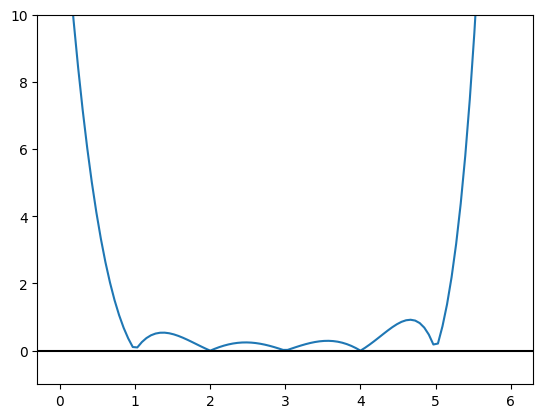

In [11]:
error = np.abs(f(x) - y)

plt.plot(x, error)
plt.axhline(color='Black')
plt.ylim(-1, 10)
plt.show()

**Exercise:**
1. Compute the 10th degree interpolating polynomial of 
$$
h(x) = \frac{1}{1 + 12 x^2}
$$
using evenly spaced interpolation points on the interval $[-2,2]$.
2. Try a higher degree polynomial. Does it fix the errors that you see?

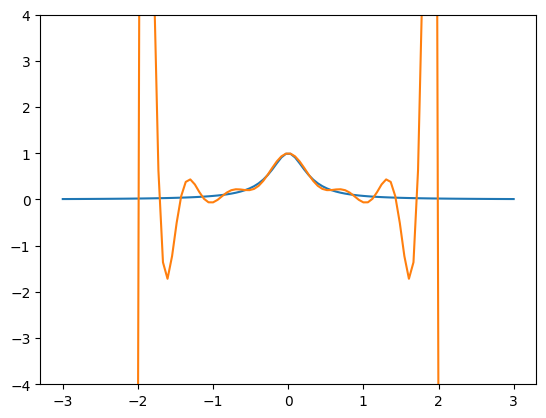

In [23]:
def h(x): return 1/(1+12*x**2)

x = np.linspace(-3, 3, 100)
x0 = np.linspace(-2, 2, 15)

c = newtons_divided_diff(x0, h(x0))

y = nested_poly(len(x0)-1, c, x, x0)

plt.plot(x,h(x),'-',label='f(x)')
plt.plot(x,y,'-',label='Interpolating poly')

plt.ylim(-4, 4)

plt.show()

**Exercise:** 
1. Compute the 6th degree interpolating polynomial of $g(x) = \sin(x)$ using evenly spaced interpolation points on the interval $[0,\pi]$.
2. Compare the interpolating polynomial with $g(x) = \sin(x)$ on the interval $[-\pi,\pi]$.